## Learning Gaussian Mixture Models with Entropy-Based Criteria

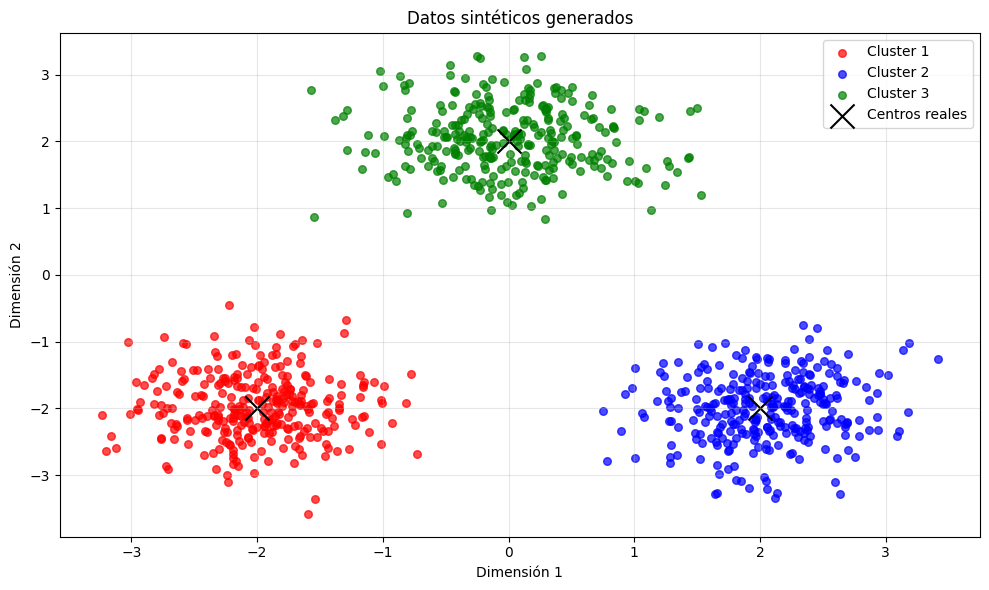

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def generar_datos_gaussianos(n_muestras=100, n_clusters=3, centros=None):
    """
    Genera datos sintéticos siguiendo distribuciones gaussianas de forma simplificada.
    
    Parámetros:
    -----------
    n_puntos_por_cluster : int
        Cantidad de puntos para cada cluster
    n_clusters : int
        Número de clusters a generar
    centros : array o None
        Coordenadas de los centros (x,y). Si es None, se generan automáticamente.
    
    Retorna:
    --------
    X : array
        Coordenadas (x,y) de todos los puntos
    y : array
        Etiqueta del cluster al que pertenece cada punto
    """
    # Si no se especifican centros, los generamos aleatoriamente
    if centros is None:
        centros = np.random.uniform(-5, 5, size=(n_clusters, 2))
    
    # Listas para almacenar los puntos y sus etiquetas
    todos_puntos = []
    todas_etiquetas = []
    
    # Para cada cluster:
    for i in range(n_clusters):
        # Obtenemos el centro del cluster actual
        centro = centros[i]
        
        # Generamos puntos con distribución normal alrededor del centro
        # con una desviación estándar de 0.5
        puntos_x = np.random.normal(centro[0], 0.5, n_muestras)
        puntos_y = np.random.normal(centro[1], 0.5, n_muestras)
        
        # Combinamos las coordenadas x e y
        #puntos_cluster = np.column_stack([puntos_x, puntos_y])
        # Usamos np.concatenate en lugar de np.column_stack
        
        puntos_cluster = np.concatenate([puntos_x[:, None], puntos_y[:, None]], axis=1)
        
        etiquetas_cluster = np.full(n_muestras, i)
        
        # En lugar de usar np.full, usamos np.repeat
        

        # Guardamos los puntos y las etiquetas del cluster
        todos_puntos.append(puntos_cluster)
        todas_etiquetas.append(np.full(n_muestras, i))
    
    # Unimos todos los clusters
    X = np.vstack(todos_puntos)
    y = np.concatenate(todas_etiquetas)
    
    return X, y

# Visualizar los datos generados
def visualizar_datos(X, y, centros=None):
    """
    Visualiza los datos generados coloreados por cluster.
    
    Parámetros:
    -----------
    X : array, shape (n_samples, 2)
        Coordenadas de los puntos.
    y : array, shape (n_samples,)
        Etiquetas de cluster.
    centros : array o None
        Coordenadas de los centros reales (opcional).
    """
    plt.figure(figsize=(10, 6))
    
    # Asignar un color a cada cluster
    # colores = plt.cm.tab10(np.linspace(0, 1, len(np.unique(y))))
    
    # # Graficar cada cluster
    # for i, color in enumerate(colores):
    #     mascara = (y == i)
    #     plt.scatter(X[mascara, 0], X[mascara, 1], 
    #                color=color, alpha=0.7, s=30, label=f'Cluster {i+1}')
    # Elegimos los colores manualmente
    colores = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
    colores = colores[:len(np.unique(y))]
    for i, color in enumerate(colores):
        mascara = (y == i)
        plt.scatter(X[mascara, 0], X[mascara, 1], 
                   color=color, alpha=0.7, s=30, label=f'Cluster {i+1}')
    
    # Graficar los centros reales si se proporcionan
    if centros is not None:
        plt.scatter(centros[:, 0], centros[:, 1], 
                   color='black', marker='x', s=300, label='Centros reales')
    
    plt.title('Datos sintéticos generados')
    plt.xlabel('Dimensión 1')
    plt.ylabel('Dimensión 2')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.savefig('datos_sinteticos.png', dpi=700)
    plt.show()

# Ejemplo de uso
centros = np.array([
    [-2, -2],  # Centro del cluster 1
    [2, -2],   # Centro del cluster 2
    [0, 2],     # Centro del cluster 3
])

X, y = generar_datos_gaussianos(n_muestras=300, n_clusters=3, 
                               centros=centros)

visualizar_datos(X, y, centros)

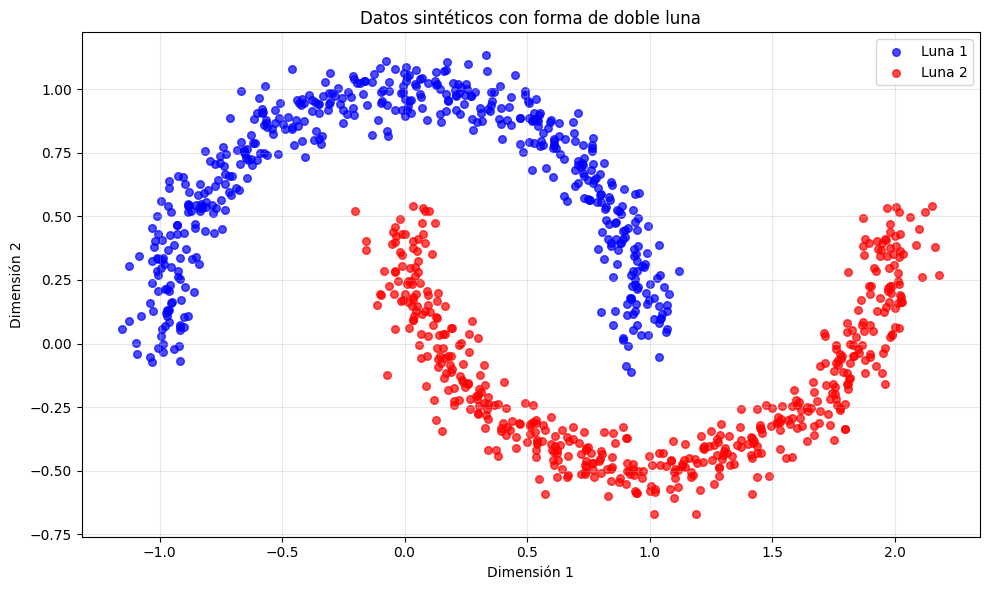

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles, make_blobs, make_classification

def generar_doble_luna(n_muestras=1000, noise=0.1, random_state=42):
    """
    Genera datos sintéticos con forma de doble luna.
    
    Parámetros:
    -----------
    n_muestras : int
        Cantidad total de puntos a generar
    noise : float
        Nivel de ruido (desviación estándar del ruido gaussiano)
    random_state : int
        Semilla para reproducibilidad
        
    Retorna:
    --------
    X : array
        Coordenadas (x,y) de todos los puntos
    y : array
        Etiqueta de la luna a la que pertenece cada punto (0 o 1)
    """
    # Utilizamos make_moons de scikit-learn para generar los datos
    X, y = make_moons(n_samples=n_muestras, noise=noise, random_state=random_state)
    
    return X, y

# Visualizar los datos generados
def visualizar_datos(X, y):
    """
    Visualiza los datos generados con forma de doble luna.
    
    Parámetros:
    -----------
    X : array, shape (n_samples, 2)
        Coordenadas de los puntos.
    y : array, shape (n_samples,)
        Etiquetas (0 o 1).
    """
    plt.figure(figsize=(10, 6))
    
    # Elegimos los colores manualmente
    colores = ['blue', 'red']
    
    # Graficamos cada luna
    for i, color in enumerate(colores):
        mascara = (y == i)
        plt.scatter(X[mascara, 0], X[mascara, 1], 
                   color=color, alpha=0.7, s=30, label=f'Luna {i+1}')
    
    plt.title('Datos sintéticos con forma de doble luna')
    plt.xlabel('Dimensión 1')
    plt.ylabel('Dimensión 2')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.savefig('doble_luna.png', dpi=700)
    plt.show()

# Ejemplo de uso
X, y = generar_doble_luna(n_muestras=1000, noise=0.07)

# Visualizamos los datos
visualizar_datos(X, y)

In [3]:
import numpy as np
import matplotlib.pyplot as plt

class DeterministicAnnealing:
    def __init__(self, n_clusters=3, T_min=0.01, T_max=5.0, epsilon=1e-6, max_iter=100):
        """
        Implementación del algoritmo Deterministic Annealing para clustering.
        
        Parámetros:
        -----------
        n_clusters : int
            Número de clusters a encontrar
        T_min : float
            Temperatura mínima para detener el enfriamiento
        T_max : float
            Temperatura inicial
        epsilon : float
            Umbral de convergencia para la matriz de pertenencia
        max_iter : int
            Número máximo de iteraciones
        """
        self.n_clusters = n_clusters
        self.T_min = T_min
        self.T_max = T_max
        self.epsilon = epsilon
        self.max_iter = max_iter
        self.centroids = None
        self.M = None  # Matriz de pertenencia
    
    def _calcular_distancia(self, X, centroides):
        """
        Calcula la matriz de distancias euclidianas al cuadrado entre puntos y centroides.
        
        Utilizamos la identidad: ||a-b||² = ||a||² + ||b||² - 2<a,b>
        donde <a,b> es el producto escalar.
        """
        # Normas al cuadrado de los puntos: (n_muestras, 1)
        normas_X = np.sum(X**2, axis=1, keepdims=True)
        
        # Normas al cuadrado de los centroides: (n_clusters,)
        normas_centroides = np.sum(centroides**2, axis=1)
        
        # Producto escalar entre puntos y centroides: (n_muestras, n_clusters)
        producto_escalar = np.dot(X, centroides.T)
        
        # Distancia euclidiana al cuadrado
        distancias = normas_X + normas_centroides - 2 * producto_escalar
        
        # Evitar errores numéricos
        return np.maximum(distancias, 0)
    
    def _actualizar_pertenencia(self, X, centroides, T):
        """
        Actualiza la matriz de pertenencia (probabilidades).
        
        Esta es la parte clave del algoritmo deterministic annealing:
        la probabilidad de pertenencia depende de la distancia y la temperatura.
        """
        D = self._calcular_distancia(X, centroides)
        beta = 1.0 / T  # Inverso de la temperatura
        
        # Calculamos exp(-beta * D) estabilizando numéricamente
        exp_term = np.exp(-beta * (D - np.min(D, axis=1, keepdims=True)))
        
        # Normalización para obtener probabilidades
        M = exp_term / np.sum(exp_term, axis=1, keepdims=True)
        
        return M
    
    def _actualizar_centroides(self, X, M):
        """
        Actualiza las posiciones de los centroides basado en la matriz de pertenencia.
        
        Cada centroide se actualiza como un promedio ponderado de todos los puntos,
        donde los pesos son las probabilidades de pertenencia.
        """
        # Suma ponderada de puntos para cada cluster
        numerador = np.dot(M.T, X)
        
        # Suma de pesos para cada cluster
        denominador = np.sum(M, axis=0)[:, np.newaxis] # Usamos axis=0 para sumar por columnas y np.newaxis para mantener la forma correcta, sino se obtiene un error
        
        # Evitar división por cero (usando operaciones vectorizadas)
        centroides = np.zeros_like(numerador)
        mascara = denominador > 0
        centroides[mascara.flatten()] = (numerador / denominador)[mascara.flatten()]
        
        return centroides
    
    def fit(self, X):
        """
        Ajusta el modelo de Deterministic Annealing a los datos.
        
        Proceso:
        1. Inicializar centroides y temperatura
        2. Bucle principal de annealing:
           - Calcular matriz de pertenencia
           - Actualizar centroides
           - Reducir temperatura
           - Verificar convergencia
        """
        n_muestras, n_dimensiones = X.shape
        
        # Inicializar centroides aleatoriamente
        self.centroids = np.random.randn(self.n_clusters, n_dimensiones)
        
        
        # Inicializar parámetros para el bucle
        t = 0  # Contador de iteraciones
        T = self.T_max  # Temperatura inicial
        convergencia = False
        M_anterior = np.ones((n_muestras, self.n_clusters)) / self.n_clusters
        
        # Bucle principal
        while not convergencia:
            # Actualizar matriz de pertenencia con temperatura actual
            self.M = self._actualizar_pertenencia(X, self.centroids, T)
            
            # Actualizar centroides
            self.centroids = self._actualizar_centroides(X, self.M)
            
            # Actualizar contador y temperatura
            t += 1
            T = 1.0 / np.log(1.0 + t)  # Programa de enfriamiento
            
            # Verificar convergencia
            diferencia = np.sum(np.abs(self.M - M_anterior))
            if (T < self.T_min) or (t >= self.max_iter) or (diferencia <= self.epsilon):
                convergencia = True
            
            # Guardar matriz actual para próxima iteración
            M_anterior = self.M.copy()
        
        return self
    
    def predict(self, X):
        """
        Predice el cluster para cada punto en X.
        
        Retorna el índice del cluster con mayor probabilidad para cada punto.
        """
        if self.centroids is None:
            raise ValueError("El modelo debe ser entrenado antes de predecir")
        
        # Calcular matriz de pertenencia a temperatura mínima (asignación casi dura)
        M = self._actualizar_pertenencia(X, self.centroids, self.T_min)
        
        # Asignar cada punto al cluster con mayor probabilidad
        return np.argmax(M, axis=1)
    
    def fit_predict(self, X):
        """
        Ajusta el modelo y predice los clusters en un solo paso.
        """
        self.fit(X)
        return np.argmax(self.M, axis=1)

Aplicando Deterministic Annealing...
Visualizando resultados del clustering...


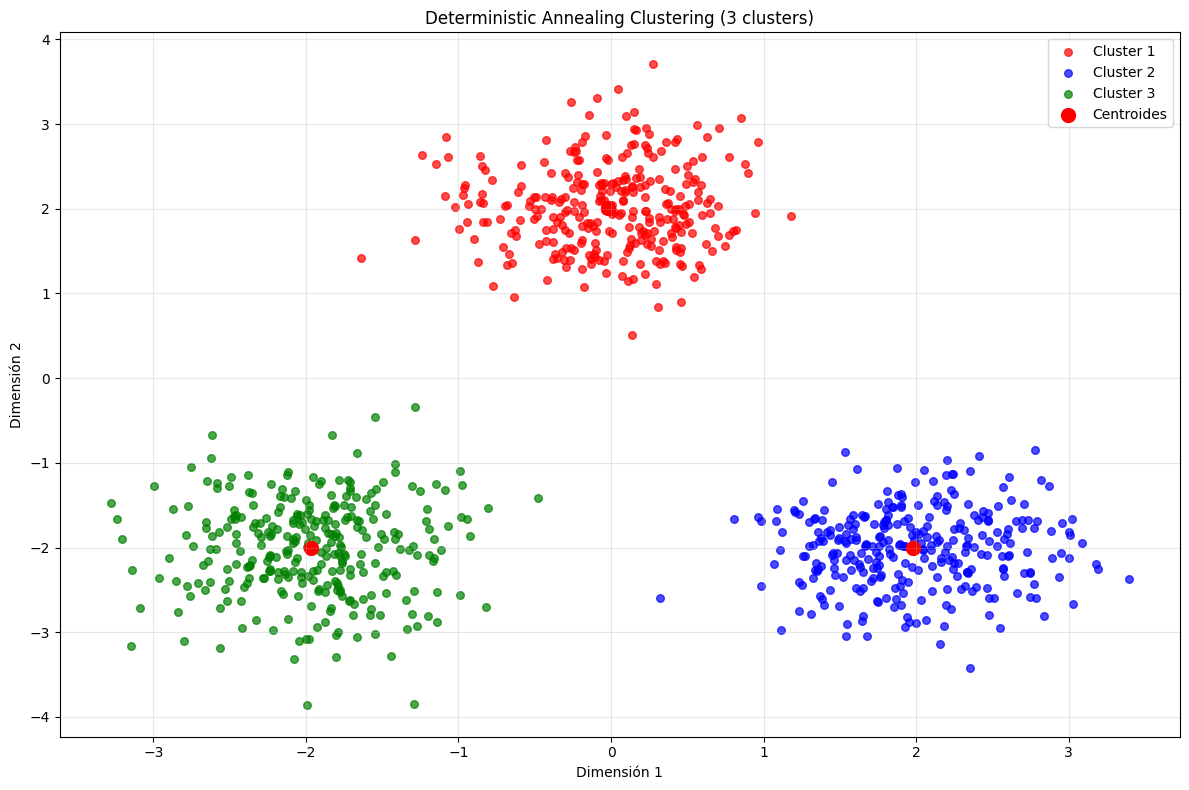

In [4]:
def demo_deterministic_annealing(n_clusters=5):
    """
    Demostración completa del algoritmo Deterministic Annealing.
    """
    centros = np.array([
        [-2, -2],  # Centro del cluster 1
        [2, -2],   # Centro del cluster 2
        [0, 2],     # Centro del cluster 3
    ])

    X, y = generar_datos_gaussianos(n_muestras=300, n_clusters=3, 
                                centros=centros)
    #X, y = generar_doble_luna(n_muestras=1000, noise=0.07)
    # 2. Aplicar Deterministic Annealing
    print("Aplicando Deterministic Annealing...")
    da = DeterministicAnnealing(
        n_clusters=n_clusters,
        T_min=0.01,
        T_max=5.0,
        epsilon=1e-4,
        max_iter=100
    )
    
    y_pred = da.fit_predict(X)
    
    # 3. Visualizar resultados
    print("Visualizando resultados del clustering...")
    plt.figure(figsize=(12, 8))
    
    # Asignar colores a los clusters
    #colores = plt.cm.tab10(np.linspace(0, 1, n_clusters))
    colores = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
    colores = colores[:len(np.unique(y))+1]
    
    # Graficar puntos por cluster
    for i in range(n_clusters):
        mascara = (y_pred == i)
        plt.scatter(X[mascara, 0], X[mascara, 1], 
                   color=colores[i], alpha=0.7, s=30, 
                   label=f'Cluster {i+1}')
    
    # Graficar centroides encontrados
    plt.scatter(da.centroids[:, 0], da.centroids[:, 1], 
               color='red', marker='o', s=100, label='Centroides')
    
    plt.title(f'Deterministic Annealing Clustering ({n_clusters} clusters)')
    plt.xlabel('Dimensión 1')
    plt.ylabel('Dimensión 2')
    plt.legend(loc='upper right')
    plt.grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return da

# Ejecutar demostración
modelo = demo_deterministic_annealing(n_clusters=3)

In [5]:
import numpy as np
import matplotlib.pyplot as plt

class DeterministicAnnealing:
    def __init__(self, n_clusters=3, T_min=0.01, T_max=5.0, epsilon=1e-6, max_iter=100):
        """
        Implementación del algoritmo Deterministic Annealing para clustering.
        
        Parámetros:
        -----------
        n_clusters : int
            Número de clusters a encontrar
        T_min : float
            Temperatura mínima para detener el enfriamiento
        T_max : float
            Temperatura inicial
        epsilon : float
            Umbral de convergencia para la matriz de pertenencia
        max_iter : int
            Número máximo de iteraciones
        """
        self.n_clusters = n_clusters
        self.T_min = T_min
        self.T_max = T_max
        self.epsilon = epsilon
        self.max_iter = max_iter
        self.centroids = None
        self.M = None  # Matriz de pertenencia
        
        # Para seguimiento de la evolución de la entropía
        self.entropy_per_point_history = []
        self.entropy_per_cluster_history = []
    
    def _calcular_distancia(self, X, centroides):
        """
        Calcula la matriz de distancias euclidianas al cuadrado entre puntos y centroides.
        
        Utilizamos la identidad: ||a - b||² = ||a||² + ||b||² - 2<a,b>
        donde <a,b> es el producto escalar.
        """
        # Normas al cuadrado de los puntos: (n_muestras, 1)
        normas_X = np.sum(X**2, axis=1, keepdims=True)
        
        # Normas al cuadrado de los centroides: (n_clusters,)
        normas_centroides = np.sum(centroides**2, axis=1)
        
        # Producto escalar entre puntos y centroides: (n_muestras, n_clusters)
        producto_escalar = np.dot(X, centroides.T)
        
        # Distancia euclidiana al cuadrado
        distancias = normas_X + normas_centroides - 2 * producto_escalar
        
        # Evitar errores numéricos
        return np.maximum(distancias, 0)
    
    def _actualizar_pertenencia(self, X, centroides, T):
        """
        Actualiza la matriz de pertenencia (probabilidades).
        
        Esta es la parte clave del algoritmo deterministic annealing:
        la probabilidad de pertenencia depende de la distancia y la temperatura.
        """
        D = self._calcular_distancia(X, centroides)
        beta = 1.0 / T  # Inverso de la temperatura
        
        # Calculamos exp(-beta * D) estabilizando numéricamente
        exp_term = np.exp(-beta * (D - np.min(D, axis=1, keepdims=True)))
        
        # Normalización para obtener probabilidades
        M = exp_term / np.sum(exp_term, axis=1, keepdims=True)
        
        return M
    
    def _actualizar_centroides(self, X, M):
        """
        Actualiza las posiciones de los centroides basado en la matriz de pertenencia.
        
        Cada centroide se actualiza como un promedio ponderado de todos los puntos,
        donde los pesos son las probabilidades de pertenencia.
        """
        # Suma ponderada de puntos para cada cluster
        numerador = np.dot(M.T, X)
        
        # Suma de pesos para cada cluster
        denominador = np.sum(M, axis=0)[:, np.newaxis] # Usamos axis=0 para sumar por columnas y np.newaxis para mantener la forma correcta, sino se obtiene un error
        
        # Evitar división por cero (usando operaciones vectorizadas)
        centroides = np.zeros_like(numerador)
        mascara = denominador > 0
        centroides[mascara.flatten()] = (numerador / denominador)[mascara.flatten()]
        
        return centroides
    
    def calcular_entropia_por_punto(self):
        """
        Calcula la entropía condicional H(C|X), que es la entropía por punto.
        
        Esta entropía mide la incertidumbre en la asignación de clusters para cada punto.
        """
        # Evitar log(0)
        M_safe = np.maximum(self.M, 1e-10)
        
        # H(C|X) = -1/m * Σₐ Σᵢ <Mₐᵢ> * log(<Mₐᵢ>)
        entropia_puntos = -np.sum(M_safe * np.log(M_safe)) / len(M_safe)
        
        return entropia_puntos
    
    def calcular_entropia_por_cluster(self):
        """
        Calcula la entropía condicional H(X|C), que es la entropía por cluster.
        
        Esta entropía mide qué tan uniforme es la distribución de puntos dentro de cada cluster.
        También devuelve un array con las entropías individuales de cada cluster.
        """
        n_muestras = len(self.M)
        entropias_clusters = []
        entropia_total = 0
        
        # Para cada cluster i
        for i in range(self.n_clusters):
            # p(C=i) = 1/m * Σₐ <Mₐᵢ>
            p_c = np.sum(self.M[:, i]) / n_muestras # Con self.M[:, i] se obtiene la columna i de la matriz de pertenencia
            if p_c > 0:
                # p(X=a|C=i) = <Mₐᵢ> / Σₐ <Mₐᵢ>
                p_x_dado_c = self.M[:, i] / np.sum(self.M[:, i])
                
                # Evitar log(0)
                p_x_dado_c = np.maximum(p_x_dado_c, 1e-10)
                
                # H(X|C=i) = -Σₐ p(X=a|C=i) * log(p(X=a|C=i))
                entropia_cluster = -np.sum(p_x_dado_c * np.log(p_x_dado_c))
                
                # Contribución a la entropía total
                entropia_total += p_c * entropia_cluster
                
                # Guardar la entropía de este cluster
                entropias_clusters.append(entropia_cluster)
            else:
                # Si el cluster está vacío, su entropía es cero
                entropias_clusters.append(0)
        
        return entropia_total, np.array(entropias_clusters)
     
    def fit(self, X):
        """
        Ajusta el modelo de Deterministic Annealing a los datos.
        
        Proceso:
        1. Inicializar centroides y temperatura
        2. Bucle principal de annealing:
           - Calcular matriz de pertenencia
           - Actualizar centroides
           - Reducir temperatura
           - Verificar convergencia
        """
        n_muestras, n_dimensiones = X.shape
        
        # Inicializar centroides aleatoriamente
        self.centroids = np.random.randn(self.n_clusters, n_dimensiones)
        
        # Inicializar parámetros para el bucle
        t = 0  # Contador de iteraciones
        T = self.T_max  # Temperatura inicial
        convergencia = False
        M_anterior = np.ones((n_muestras, self.n_clusters)) / self.n_clusters
        
        # Para seguimiento de la evolución
        self.entropy_per_point_history = []
        self.entropy_per_cluster_history = []
        
        # Bucle principal
        while not convergencia:
            
            # Actualizar matriz de pertenencia con temperatura actual
            self.M = self._actualizar_pertenencia(X, self.centroids, T)
            
            # Actualizar centroides
            self.centroids = self._actualizar_centroides(X, self.M)
            
            # Calcular y guardar entropías para seguimiento
            entropia_por_punto = self.calcular_entropia_por_punto()
            entropia_por_cluster, entropias_individuales = self.calcular_entropia_por_cluster()
            
            self.entropy_per_point_history.append(entropia_por_punto)
            self.entropy_per_cluster_history.append((entropia_por_cluster, entropias_individuales))
            
            # Actualizar contador y temperatura
            t += 1
            T = 1.0 / np.log(1.0 + t)  # Programa de enfriamiento
            
            # Verificar convergencia
            diferencia = np.sum(np.abs(self.M - M_anterior))
            if (T < self.T_min) or (t >= self.max_iter) or (diferencia <= self.epsilon):
                convergencia = True
            
            # Guardar matriz actual para próxima iteración
            M_anterior = self.M.copy()
        
        return self
    
    def predict(self, X):
        """
        Predice el cluster para cada punto en X.
        
        Retorna el índice del cluster con mayor probabilidad para cada punto.
        """
        if self.centroids is None:
            raise ValueError("El modelo debe ser entrenado antes de predecir")
        
        # Calcular matriz de pertenencia a temperatura mínima (asignación casi dura)
        M = self._actualizar_pertenencia(X, self.centroids, self.T_min)
        
        # Asignar cada punto al cluster con mayor probabilidad
        return np.argmax(M, axis=1)
    
    def fit_predict(self, X):
        """
        Ajusta el modelo y predice los clusters en un solo paso.
        """
        self.fit(X)
        return np.argmax(self.M, axis=1)

Aplicando Deterministic Annealing...
Visualizando resultados del clustering...


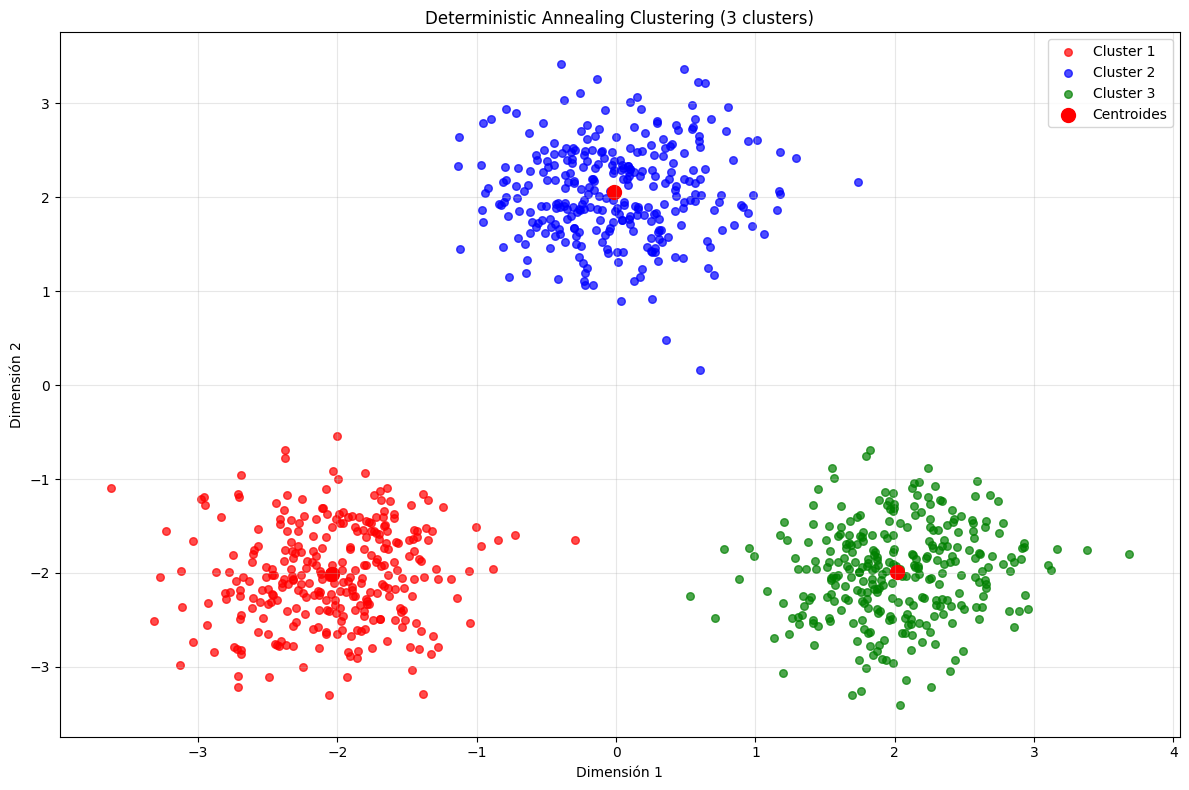

In [6]:
def demo_deterministic_annealing(n_clusters=5):
    """
    Demostración completa del algoritmo Deterministic Annealing.
    """
    centros = np.array([
        [-2, -2],  # Centro del cluster 1
        [2, -2],   # Centro del cluster 2
        [0, 2],     # Centro del cluster 3
    ])

    X, y = generar_datos_gaussianos(n_muestras=300, n_clusters=3, 
                                centros=centros)
    #X, y = generar_doble_luna(n_muestras=1000, noise=0.07)
    # 2. Aplicar Deterministic Annealing
    print("Aplicando Deterministic Annealing...")
    da = DeterministicAnnealing(
        n_clusters=n_clusters,
        T_min=0.01,
        T_max=5.0,
        epsilon=1e-4,
        max_iter=100
    )
    
    y_pred = da.fit_predict(X)
    
    # 3. Visualizar resultados
    print("Visualizando resultados del clustering...")
    plt.figure(figsize=(12, 8))
    
    # Asignar colores a los clusters
    #colores = plt.cm.tab10(np.linspace(0, 1, n_clusters))
    colores = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
    colores = colores[:len(np.unique(y))+1]
    
    # Graficar puntos por cluster
    for i in range(n_clusters):
        mascara = (y_pred == i)
        plt.scatter(X[mascara, 0], X[mascara, 1], 
                   color=colores[i], alpha=0.7, s=30, 
                   label=f'Cluster {i+1}')
    
    # Graficar centroides encontrados
    plt.scatter(da.centroids[:, 0], da.centroids[:, 1], 
               color='red', marker='o', s=100, label='Centroides')
    
    plt.title(f'Deterministic Annealing Clustering ({n_clusters} clusters)')
    plt.xlabel('Dimensión 1')
    plt.ylabel('Dimensión 2')
    plt.legend(loc='upper right')
    plt.grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return da

# Ejecutar demostración
modelo = demo_deterministic_annealing(n_clusters=3)

Aplicando Deterministic Annealing...
Visualizando resultados del clustering...


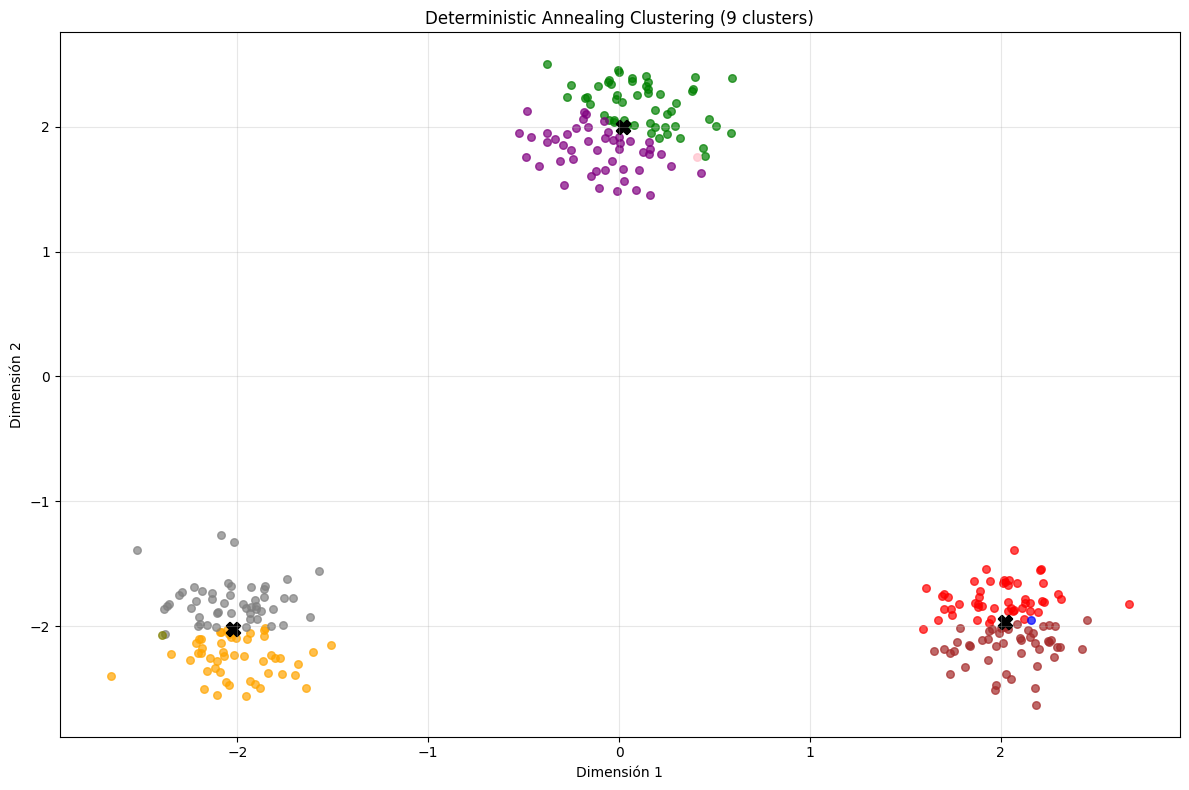

Visualizando evolución de entropía por cluster...


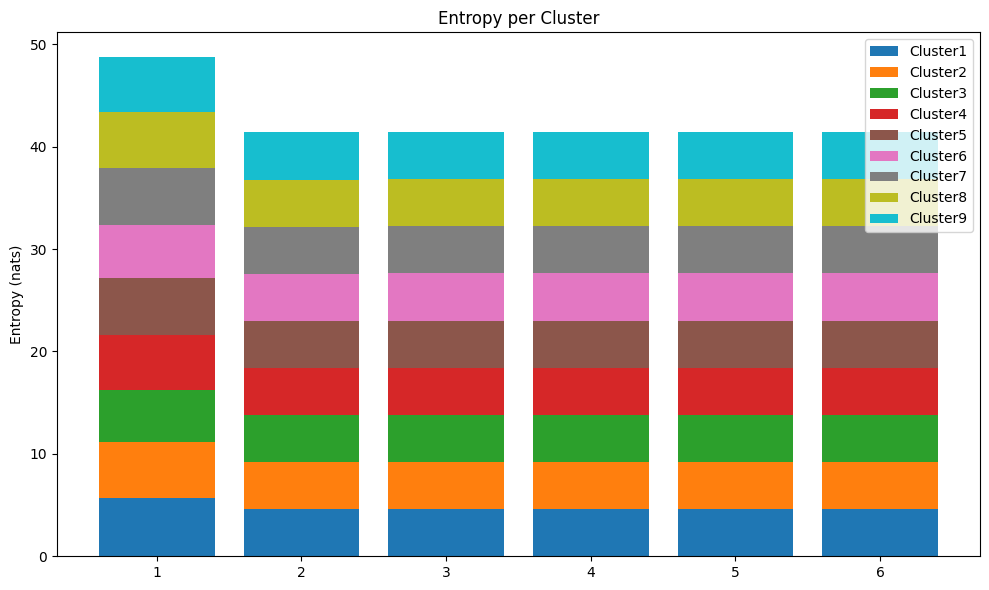

Visualizando entropía por punto...


/var/folders/mz/h7lyhbx179g0m6677zcjjdbc0000gn/T/ipykernel_85858/42879459.py:130: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap('tab10')


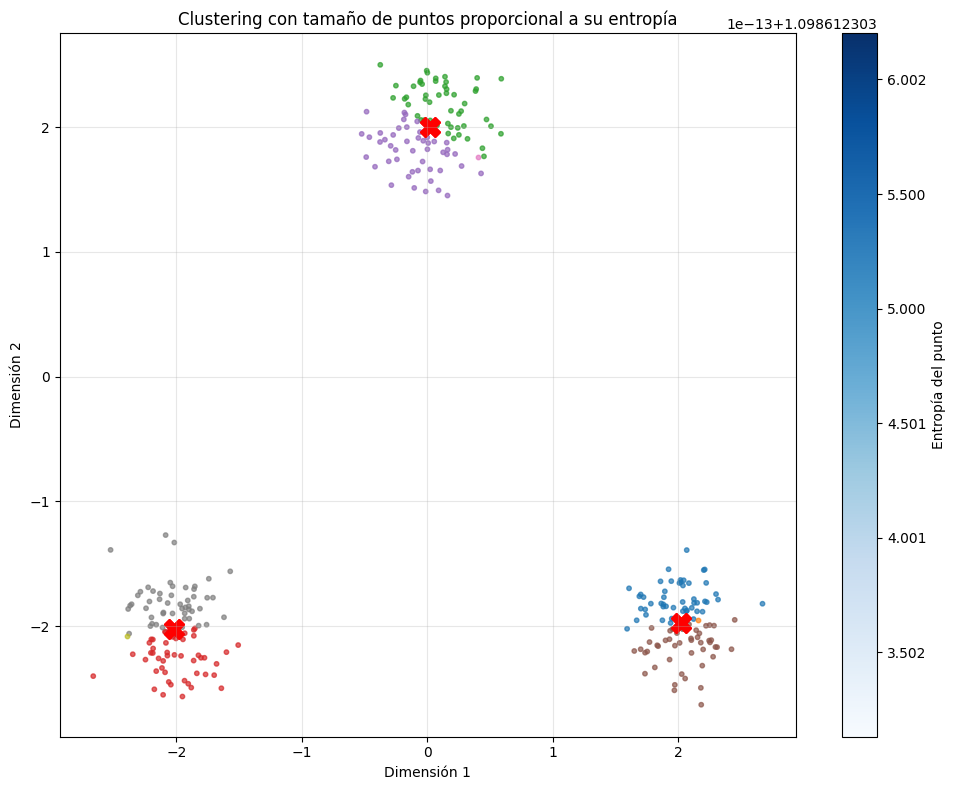

Entropia final por cluster: (4.605170646505084, array([4.60517065, 4.60517065, 4.60517065, 4.60517065, 4.60517065,
       4.60517065, 4.60517065, 4.60517065, 4.60517065]))


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

def generar_datos_gaussianos(n_muestras=300, n_clusters=3, centros=None, std=0.25):
    """
    Genera datos gaussianos para testing con clusters.
    
    Parámetros:
    -----------
    n_muestras : int
        Número total de muestras a generar
    n_clusters : int
        Número de clusters
    centros : array, opcional
        Array de forma (n_clusters, n_dimensiones) con los centros de los clusters
    std : float
        Desviación estándar de los datos generados
    """
    # Si no se proporcionan centros, generarlos aleatoriamente
    if centros is None:
        centros = np.random.rand(n_clusters, 2) * 10 - 5
    
    # Muestras por cluster
    n_por_cluster = n_muestras // n_clusters
    
    # Generar datos
    X = []
    y = []
    
    for i, centro in enumerate(centros):
        X_cluster = np.random.normal(loc=centro, scale=std, size=(n_por_cluster, 2))
        X.append(X_cluster)
        y.append(np.full(n_por_cluster, i))
    
    # Concatenar y mezclar
    X = np.vstack(X)
    y = np.concatenate(y)
    
    # Mezclar datos
    indices = np.arange(len(X))
    np.random.shuffle(indices)
    
    return X[indices], y[indices]

def plot_entropia_por_cluster(modelo):
    """
    Grafica la evolución de la entropía por cluster a lo largo de las iteraciones.
    """
    num_iteraciones = len(modelo.entropy_per_cluster_history)
    num_clusters = modelo.n_clusters
    
    # Obtener entropías por cluster en cada iteración
    entropias_por_iteracion = []
    for i in range(num_iteraciones):
        # Obtener entropías individuales para esta iteración
        _, entropias_individuales = modelo.entropy_per_cluster_history[i]
        entropias_por_iteracion.append(entropias_individuales)
    
    # Crear matriz de entropías para graficar
    entropias_array = np.zeros((num_iteraciones, num_clusters))
    for i, entropias in enumerate(entropias_por_iteracion):
        # Asegurarse de que hay suficientes entropías (por si algún cluster está vacío)
        for j in range(min(num_clusters, len(entropias))):
            entropias_array[i, j] = entropias[j]
    
    # Seleccionar algunas iteraciones representativas para mostrar (como en la imagen de ejemplo)
    if num_iteraciones > 6:
        indices_seleccionados = np.linspace(0, num_iteraciones-1, 6, dtype=int)
    else:
        indices_seleccionados = np.arange(num_iteraciones)
    
    iteraciones_seleccionadas = [entropias_array[i] for i in indices_seleccionados]
    
    # Crear gráfico de barras apiladas
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Colores para los clusters
    colores = plt.cm.tab10(np.linspace(0, 1, num_clusters))
    
    # Posiciones de las barras
    posiciones = np.arange(len(indices_seleccionados)) + 1
    
    # Para cada cluster, crear una barra apilada
    fondo = np.zeros(len(indices_seleccionados))
    
    for i in range(num_clusters):
        valores = [iter_entropias[i] for iter_entropias in iteraciones_seleccionadas]
        ax.bar(posiciones, valores, bottom=fondo, color=colores[i], label=f'Cluster{i+1}')
        fondo += valores
    
    ax.set_title('Entropy per Cluster')
    ax.set_xticks(posiciones)
    ax.set_ylabel('Entropy (nats)')
    ax.legend()
    
    plt.tight_layout()
    return fig

def plot_entropia_por_punto(modelo, X):
    """
    Crea un scatter plot donde el tamaño de cada punto depende de su entropía.
    """
    # Calcular entropía para cada punto
    entropias_puntos = []
    for i in range(len(X)):
        # Probabilidades de pertenencia para este punto
        probs = modelo.M[i]
        # Evitar log(0)
        probs_safe = np.maximum(probs, 1e-10)
        # Entropía para este punto
        entropia = -np.sum(probs_safe * np.log(probs_safe))
        entropias_puntos.append(entropia)
    
    entropias_puntos = np.array(entropias_puntos)
    
    # Normalizar entropías para tamaños de puntos
    # Convertimos las entropías a un rango de tamaños entre 10 y 100
    min_entropia = np.min(entropias_puntos)
    max_entropia = np.max(entropias_puntos)
    tamanios = 10 + 90 * (entropias_puntos - min_entropia) / (max_entropia - min_entropia + 1e-10)
    
    # Predicciones de clusters
    y_pred = np.argmax(modelo.M, axis=1)
    
    # Crear gráfico
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Colormap para los clusters
    cmap = get_cmap('tab10')
    colores = [cmap(i) for i in range(modelo.n_clusters)]
    
    # Graficar puntos coloreados por cluster y tamaño por entropía
    for i in range(modelo.n_clusters):
        mascara = (y_pred == i)
        ax.scatter(X[mascara, 0], X[mascara, 1], 
                   c=[colores[i]], s=tamanios[mascara], 
                   alpha=0.7, label=f'Cluster {i+1}')
    
    # Graficar centroides
    ax.scatter(modelo.centroids[:, 0], modelo.centroids[:, 1], 
              color='red', marker='X', s=200, label='Centroides')
    
    # Añadir una barra de color para la entropía
    import matplotlib.cm as cm
    import matplotlib.colors as colors
    
    # Crear un gradiente de color para la entropía
    norm = colors.Normalize(vmin=min_entropia, vmax=max_entropia)
    sm = cm.ScalarMappable(cmap=cm.Blues, norm=norm)
    sm.set_array([])
    
    cbar = plt.colorbar(sm, ax=ax)
    cbar.set_label('Entropía del punto')
    
    ax.set_title('Clustering con tamaño de puntos proporcional a su entropía')
    ax.set_xlabel('Dimensión 1')
    ax.set_ylabel('Dimensión 2')
    #ax.legend()
    ax.grid(alpha=0.3)
    
    plt.tight_layout()
    return fig

def demo_deterministic_annealing_con_entropia(n_clusters=3):
    """
    Demostración completa del algoritmo Deterministic Annealing con visualización de entropía.
    """
    # 1. Generar datos
    centros = np.array([
        [-2, -2],  # Centro del cluster 1
        [2, -2],   # Centro del cluster 2
        [0, 2],    # Centro del cluster 3
    ])
    
    X, y = generar_datos_gaussianos(n_muestras=300, n_clusters=3, centros=centros)
    
    # 2. Aplicar Deterministic Annealing
    print("Aplicando Deterministic Annealing...")
    da = DeterministicAnnealing(
        n_clusters=n_clusters,
        T_min=0.01,
        T_max=5.0,
        epsilon=1e-4,
        max_iter=100
    )
    
    y_pred = da.fit_predict(X)
    
    # 3. Visualizar resultados básicos
    print("Visualizando resultados del clustering...")
    plt.figure(figsize=(12, 8))
    
    # Asignar colores a los clusters
    colores = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta', 'yellow', 'black']
    colores = colores[:n_clusters]
    
    # Graficar puntos por cluster
    for i in range(n_clusters):
        mascara = (y_pred == i)
        plt.scatter(X[mascara, 0], X[mascara, 1], 
                   color=colores[i], alpha=0.7, s=30, 
                   label=f'Cluster {i+1}')
    
    # Graficar centroides encontrados
    plt.scatter(da.centroids[:, 0], da.centroids[:, 1], 
               color='black', marker='X', s=100, label='Centroides')
    
    plt.title(f'Deterministic Annealing Clustering ({n_clusters} clusters)')
    plt.xlabel('Dimensión 1')
    plt.ylabel('Dimensión 2')
    #plt.legend(loc='upper right')
    # No imprimimos la leyenda para evitar superposición con la barra de color
    plt.grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # 4. Visualizar entropía por cluster
    print("Visualizando evolución de entropía por cluster...")
    fig_entropia_cluster = plot_entropia_por_cluster(da)
    plt.show()
    
    # 5. Visualizar entropía por punto
    print("Visualizando entropía por punto...")
    fig_entropia_punto = plot_entropia_por_punto(da, X)
    plt.show()
    
    return da

# Para usar esta función:
modelo = demo_deterministic_annealing_con_entropia(n_clusters=9)
print("Entropia final por cluster:", modelo.calcular_entropia_por_cluster())


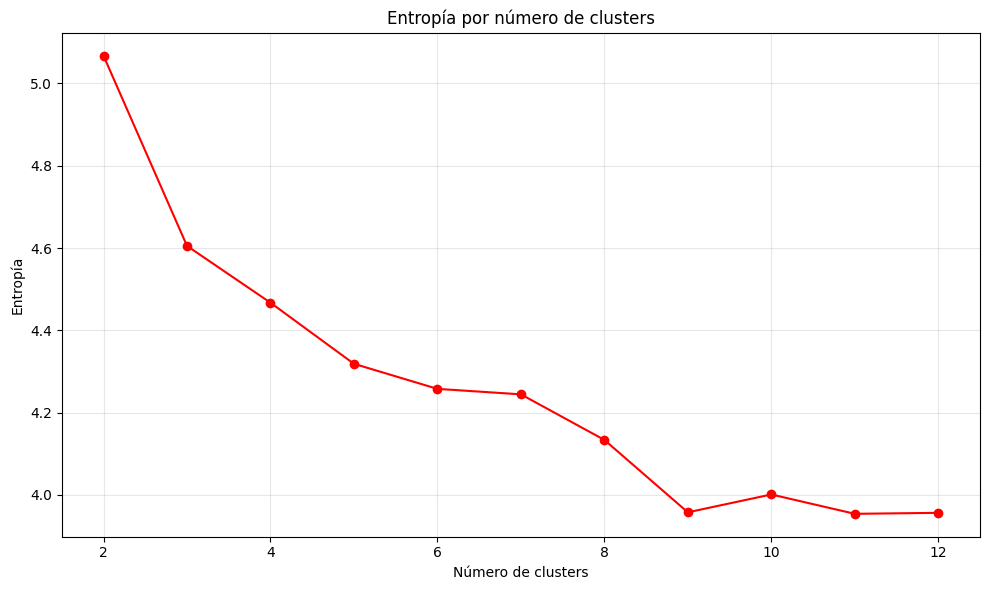

In [8]:
# 5.067268612873276 -> 2
# 4.605170646055333 -> 3
# 4.467127594210047 -> 4
# 4.318664285336398 -> 5
# 4.257749649090237 -> 6
# 4.244473973709584 -> 7
# 4.1337585003769055 -> 8
# 3.957764401686084 -> 9
# 4.001169648828887 -> 10
# 3.9541275060315906 -> 11
# 3.9565135650894847 -> 12

# Dibujamos una grafica de como varia la entropia en funcion del numero de clusters
plt.figure(figsize=(10, 6))
entropias = [5.067268612873276, 4.605170646055333, 4.467127594210047, 4.318664285336398, 4.257749649090237, 4.244473973709584, 4.1337585003769055, 3.957764401686084, 4.001169648828887, 3.9541275060315906, 3.9565135650894847]
plt.plot(range(2, 13), entropias, marker='o', color='red')
plt.title('Entropía por número de clusters')
plt.xlabel('Número de clusters')
plt.ylabel('Entropía')
plt.grid(alpha=0.3)
plt.tight_layout()
#plt.savefig('entropia_clusters.png', dpi=700)
plt.show()

In [9]:
# 4.488216528415952 -> 4
# 4.359429911899708 -> 5
# 4.199537019067531 -> 6